# Problema 2 - Linha de Produção
É basicamente o problema do caminho crítico

In [81]:
import networkx as nx
import matplotlib.pyplot as plt
import sys

In [3]:
# Enumeração Primitiva
S = 0
A = 1
B = 2
C = 3
D = 4
E = 5
F = 6
G_v = 7
H = 8
I = 9
J = 10
K = 11
L = 12

In [58]:
# Criando nosso grafo ponderado
G = nx.DiGraph()
G.add_edges_from(
    [
        (S, C,     {"weight": 10}),
        (S, A,     {"weight": 8}),
        (S, D,     {"weight": 12}),
        (S, B,     {"weight": 8}),
        
        (C, E,     {"weight": 8}),
        (C, F,     {"weight": 11}),
        
        (A, E,     {"weight": 8}),
        (A, F,     {"weight": 11}),
        (A, G_v,     {"weight": 15}),
        
        (D, G_v,     {"weight": 15}),
        
        (B, L,     {"weight": 7}),
        
        (E, H,     {"weight": 9}),
        
        (F, I,     {"weight": 7}),
        (G_v, J,     {"weight": 4}),
        
        (H, J,     {"weight": 4}),
        
        (J, K,     {"weight": 6}),
        
        (K, L,     {"weight": 7}),
        
        (I, K,     {"weight": 6}),  
    ]
)

G.edges()

OutEdgeView([(0, 3), (0, 1), (0, 4), (0, 2), (3, 5), (3, 6), (1, 5), (1, 6), (1, 7), (4, 7), (2, 12), (5, 8), (6, 9), (7, 10), (8, 10), (9, 11), (10, 11), (11, 12)])

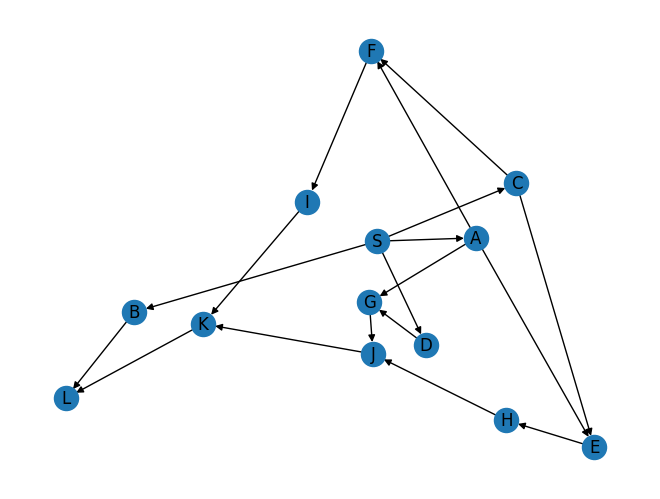

In [59]:
labels = {}
labels[S] = r"S"
labels[A] = r"A"
labels[B] = r"B"
labels[C] = r"C"
labels[D] = r"D"
labels[E] = r"E"
labels[F] = r"F"
labels[G_v] = r"G"
labels[H] = r"H"
labels[I] = r"I"
labels[J] = r"J"
labels[K] = r"K"
labels[L] = r"L"

options = {
    'node_color': 'red',
    'node_size': 200,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 12,
    'labels': labels,
}

nx.draw(G, labels=labels)

# É o problema do Caminho Crítico


In [60]:
maior_caminho = nx.dag_longest_path(G)
peso_maior_caminho = nx.dag_longest_path_length(G)

In [61]:
vertices = {
    S: "S",
    A: "A",
    B: "B",
    C: "C",
    D: "D",
    E: "E",
    F: "F",
    G_v: "G",
    H: "H",
    I: "I",
    J: "J",
    K: "K",
    L: "L",
}

for i in maior_caminho:
    print(f"{vertices[i]} -> ", end="")
print("FIM")
print(f"Peso do caminho: {peso_maior_caminho}")

S -> D -> G -> J -> K -> L -> FIM
Peso do caminho: 44


### O que sabemos até agora
Com o caminho de maior peso, também chamado de **caminho crítico**, encontrado acima, podemos definir que os vértices pertencentes a ele são essenciais para o menor tempo de execução, portanto, não podem se dispor a folgas. Assim temos:
* O tempo mínimo para realização da atividade é $44$
* As tarefas que não podem ter folgas são $D(4), G(7), J(10), K(11), L(12)$

Agora vamos encontrar as folgas para cada tarefa restante. Para encontrar essas folgas, calculamos o tempo de cada caminho em relação ao caminho crítico.

In [90]:
tempo_de_ida = [0 for i in range(13)]

# Vamos usar o BFS
for i in nx.edge_bfs(G, S):
    peso = G.get_edge_data(i[0], i[1])["weight"]
    # Soma o próximo com o anterior
    # E = pi[C] + w(C, E)   # O caminho total do E soma com o peso da aresta
    soma = tempo_de_ida[i[0]] + peso
    tempo_de_ida[i[1]] = max(soma, tempo_de_ida[i[1]])   
    print(f"({vertices[i[0]]} -> {vertices[i[1]]}) = {peso}")

for i in range(13):
    print(f"{vertices[i]} = {tempo_de_ida[i]}")

(S -> C) = 10
(S -> A) = 8
(S -> D) = 12
(S -> B) = 8
(C -> E) = 8
(C -> F) = 11
(A -> E) = 8
(A -> F) = 11
(A -> G) = 15
(D -> G) = 15
(B -> L) = 7
(E -> H) = 9
(F -> I) = 7
(G -> J) = 4
(H -> J) = 4
(I -> K) = 6
(J -> K) = 6
(K -> L) = 7
S = 0
A = 8
B = 8
C = 10
D = 12
E = 18
F = 21
G = 27
H = 27
I = 28
J = 31
K = 37
L = 44


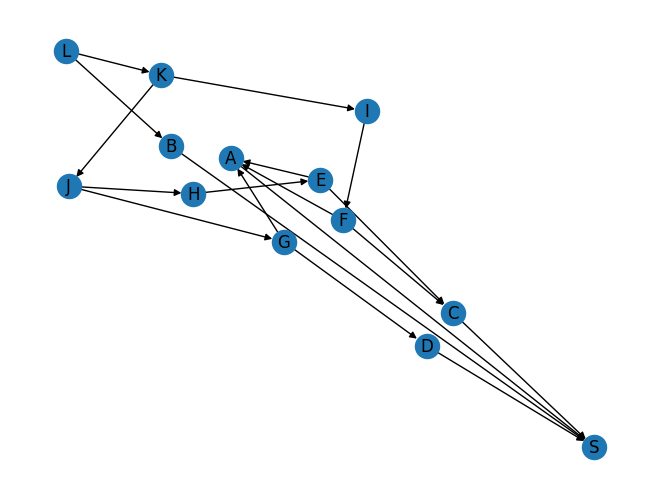

In [73]:
# Agora o de volta
G_revertido = G.reverse()
nx.draw(G_revertido, labels=labels)

In [91]:
tempo_de_volta = [sys.maxsize for i in range(13)]
tempo_de_volta[L] = tempo_de_ida[L]
# Vamos usar o BFS
for i in nx.edge_bfs(G_revertido, L):
    peso = G_revertido.get_edge_data(i[0], i[1])["weight"]
    # Soma o próximo com o anterior
    # E = pi[C] + w(C, E)   # O caminho total do E soma com o peso da aresta
    soma = tempo_de_volta[i[0]] - peso
    tempo_de_volta[i[1]] = min(soma, tempo_de_volta[i[1]])
    
    print(f"({vertices[i[0]]} -> {vertices[i[1]]}) = {peso}\tSoma = {soma}")

for i in range(13):
    print(f"{vertices[i]} = {tempo_de_volta[i]}")

(L -> B) = 7	Soma = 37
(L -> K) = 7	Soma = 37
(B -> S) = 8	Soma = 29
(K -> I) = 6	Soma = 31
(K -> J) = 6	Soma = 31
(I -> F) = 7	Soma = 24
(J -> G) = 4	Soma = 27
(J -> H) = 4	Soma = 27
(F -> C) = 11	Soma = 13
(F -> A) = 11	Soma = 13
(G -> A) = 15	Soma = 12
(G -> D) = 15	Soma = 12
(H -> E) = 9	Soma = 18
(C -> S) = 10	Soma = 3
(A -> S) = 8	Soma = 4
(D -> S) = 12	Soma = 0
(E -> C) = 8	Soma = 10
(E -> A) = 8	Soma = 10
S = 0
A = 10
B = 37
C = 10
D = 12
E = 18
F = 24
G = 27
H = 27
I = 31
J = 31
K = 37
L = 44


Agora, com esses dados, vamos calcular as respectivas folgas, dadas pela fórmula abaixo
$$folga = \textit{tempo\_de\_volta}[V] - \textit{tempo\_de\_ida}[V] (\forall V \in G)$$

In [92]:
for v in vertices:
    print(f"Folga de {vertices[v]} = {tempo_de_volta[v] - tempo_de_ida[v]} ")

Folga de S = 0 
Folga de A = 2 
Folga de B = 29 
Folga de C = 0 
Folga de D = 0 
Folga de E = 0 
Folga de F = 3 
Folga de G = 0 
Folga de H = 0 
Folga de I = 3 
Folga de J = 0 
Folga de K = 0 
Folga de L = 0 
